In [ ]:
#import libraries
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Read Data
data = pd.read_csv('data.csv')
data

In [ ]:
#Shape of dataset
data.shape

In [ ]:
data=data.drop(labels=['yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_n','yearly_sunlight_kwh_s','yearly_sunlight_kwh_w','number_of_panels_e','number_of_panels_s','number_of_panels_w','yearly_sunlight_kwh_f','number_of_panels_f','number_of_panels_n','kw_total                    '], axis=1)
data

In [5]:
#Type of datatypes
data.dtypes

state_name                    object
region_name                    int64
percent_qualified            float64
yearly_sunlight_kwh_total    float64
number_of_panels_total       float64
lat_avg                      float64
lng_avg                      float64
kw_total                     float64
dtype: object

In [6]:
#Check Null Values
data.isnull().sum()

state_name                    1
region_name                   0
percent_qualified             0
yearly_sunlight_kwh_total    58
number_of_panels_total       58
lat_avg                       0
lng_avg                       0
kw_total                     58
dtype: int64

In [7]:
# Summary of the data set
data.describe([0.05, 0.50, 0.95, 0.99]).T

,count,mean,std,min,5%,50%,95%,99%,max
region_name,48722.0,2.667656e+10,1.619133e+10,1.001020e+09,6.001407e+09,2.616350e+10,5.174021e+10,5.507902e+10,5.603997e+10
percent_qualified,48722.0,7.741123e+01,1.571284e+01,0.000000e+00,4.861354e+01,7.980376e+01,9.757914e+01,9.944134e+01,1.000000e+02
yearly_sunlight_kwh_total,48664.0,2.234360e+07,2.262537e+07,2.178341e+03,2.180302e+06,1.686481e+07,5.972376e+07,1.039047e+08,5.339304e+08
number_of_panels_total,48664.0,6.848364e+04,6.652033e+04,8.000000e+00,7.370050e+03,5.292250e+04,1.797662e+05,3.102752e+05,1.545850e+06
lat_avg,48722.0,3.745727e+01,5.070044e+00,1.956049e+01,2.853307e+01,3.844280e+01,4.487137e+01,4.765683e+01,6.498893e+01
lng_avg,48722.0,-9.301239e+01,1.712806e+01,-1.581242e+02,-1.221821e+02,-8.768416e+01,-7.332281e+01,-7.106571e+01,-6.826817e+01
kw_total,48664.0,1.712091e+04,1.663008e+04,2.000000e+00,1.842513e+03,1.323062e+04,4.494156e+04,7.756880e+04,3.864625e+05


In [8]:
#Decription of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48722 entries, 0 to 48721
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state_name                 48721 non-null  object 
 1   region_name                48722 non-null  int64  
 2   percent_qualified          48722 non-null  float64
 3   yearly_sunlight_kwh_total  48664 non-null  float64
 4   number_of_panels_total     48664 non-null  float64
 5   lat_avg                    48722 non-null  float64
 6   lng_avg                    48722 non-null  float64
 7   kw_total                   48664 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.0+ MB


# Pre Process DataSet

In [9]:
#Dropped rows which contatinge null values
data=data.dropna()

In [10]:
#Check Null Values
data.isnull().sum()

state_name                   0
region_name                  0
percent_qualified            0
yearly_sunlight_kwh_total    0
number_of_panels_total       0
lat_avg                      0
lng_avg                      0
kw_total                     0
dtype: int64

In [11]:
# Summary of the preporcessed data set
data.describe([0.05, 0.50, 0.95, 0.99]).T

,count,mean,std,min,5%,50%,95%,99%,max
region_name,48664.0,2.667997e+10,1.618663e+10,1.001020e+09,6.001408e+09,2.616351e+10,5.174087e+10,5.507902e+10,5.603997e+10
percent_qualified,48664.0,7.750349e+01,1.549313e+01,1.448226e-01,4.880065e+01,7.982665e+01,9.758246e+01,9.944134e+01,1.000000e+02
yearly_sunlight_kwh_total,48664.0,2.234360e+07,2.262537e+07,2.178341e+03,2.180302e+06,1.686481e+07,5.972376e+07,1.039047e+08,5.339304e+08
number_of_panels_total,48664.0,6.848364e+04,6.652033e+04,8.000000e+00,7.370050e+03,5.292250e+04,1.797662e+05,3.102752e+05,1.545850e+06
lat_avg,48664.0,3.745051e+01,5.052329e+00,1.956049e+01,2.853309e+01,3.844180e+01,4.486323e+01,4.764774e+01,6.498893e+01
lng_avg,48664.0,-9.299219e+01,1.709673e+01,-1.581242e+02,-1.221768e+02,-8.768378e+01,-7.332192e+01,-7.106576e+01,-6.826817e+01
kw_total,48664.0,1.712091e+04,1.663008e+04,2.000000e+00,1.842513e+03,1.323062e+04,4.494156e+04,7.756880e+04,3.864625e+05


# Analyse Data Set

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


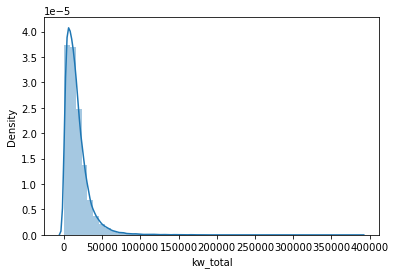

In [12]:
# Power Generation Distribution
from matplotlib.pyplot import figure

plt.figure.Figure(figsize=(6,6))
sns.distplot(data["kw_total"], hist=True);

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48664 entries, 0 to 48721
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state_name                 48664 non-null  object 
 1   region_name                48664 non-null  int64  
 2   percent_qualified          48664 non-null  float64
 3   yearly_sunlight_kwh_total  48664 non-null  float64
 4   number_of_panels_total     48664 non-null  float64
 5   lat_avg                    48664 non-null  float64
 6   lng_avg                    48664 non-null  float64
 7   kw_total                   48664 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.3+ MB


In [14]:
def grab_column_names(df):
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]

    num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and
                   df[col].dtypes != "O"]

    cat_but_car = [col for col in df.columns if df[col].nunique() > 10 and
                   df[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


In [15]:
cat_cols, num_cols, cat_but_car = grab_column_names(data)

Observations: 48664
Variables: 8
cat_cols: 0
num_cols: 7
cat_but_car: 1
num_but_cat: 0


In [16]:
num_cols = [col for col in num_cols if col not in ["region_name", "kw_total"]]

In [17]:
num_cols

['percent_qualified',
 'yearly_sunlight_kwh_total',
 'number_of_panels_total',
 'lat_avg',
 'lng_avg']

In [18]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [19]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [20]:
type(data)

pandas.core.frame.DataFrame

In [21]:
outlier_replaced=pd.DataFrame()
for col in num_cols:
    outliers = []
    print(col, check_outlier(data, col))
    
    outlier_status=check_outlier(data, col)
    median = np.median(data[col])
    if(outlier_status==True):
        low_limit, up_limit = outlier_thresholds(data, col)
        print("Low Limit\t:",low_limit)
        print("Up Limit\t:",up_limit)
        print("Original \t:",data[col].head())
        
        outlier_replaced[col] = np.where(((data[col]>up_limit)|(data[col]<low_limit)), median,data[col])
        print("Replaced Outliers \t:",outlier_replaced[col].head())
        print("======="*10)
    else:
        outlier_replaced[col]=data[col]
        


percent_qualified False
yearly_sunlight_kwh_total True
Low Limit	: -84134885.74762493
Up Limit	: 146038947.06537488
Original 	: 0    7.922383e+06
1    3.117606e+07
2    8.337565e+06
3    3.912445e+06
4    2.241812e+07
Name: yearly_sunlight_kwh_total, dtype: float64
Replaced Outliers 	: 0    7.922383e+06
1    3.117606e+07
2    8.337565e+06
3    3.912445e+06
4    2.241812e+07
Name: yearly_sunlight_kwh_total, dtype: float64
number_of_panels_total True
Low Limit	: -251224.25000000003
Up Limit	: 438360.55000000005
Original 	: 0     20876.0
1    113565.0
2     29409.0
3     14393.0
4     60394.0
Name: number_of_panels_total, dtype: float64
Replaced Outliers 	: 0     20876.0
1    113565.0
2     29409.0
3     14393.0
4     60394.0
Name: number_of_panels_total, dtype: float64
lat_avg False
lng_avg False


In [22]:
outlier_replaced

,percent_qualified,yearly_sunlight_kwh_total,number_of_panels_total,lat_avg,lng_avg
0,86.303387,7.922383e+06,20876.0,34.267040,-118.432716
1,85.813953,3.117606e+07,113565.0,43.156368,-77.607040
2,56.446991,8.337565e+06,29409.0,42.277794,-89.066589
3,38.297872,3.912445e+06,14393.0,40.422962,-79.993729
4,90.382514,2.241812e+07,60394.0,33.844044,-117.933113
...,...,...,...,...,...
48717,84.426947,2.197206e+07,64522.0,33.176277,-96.911400
48718,45.887850,2.146542e+07,74373.0,40.838047,-74.476219
48719,96.548550,3.264987e+07,86153.0,33.852547,-118.256958
48720,83.550045,3.321077e+07,104058.0,34.113491,-81.140663


In [23]:
from matplotlib import pyplot as plt1
def Box_plots(col):
    plt1.figure(figsize=(10,4))
    plt1.title("Box Plot")
    sns.boxplot(outlier_replaced[col])
    plt1.show()
    plt1.figure(figsize=(10,4))
    plt1.title("Box Plot")
    sns.boxplot(data[col])
    plt1.show()

In [24]:
type(outlier_replaced)

pandas.core.frame.DataFrame

In [25]:
data_pro = pd.DataFrame(outlier_replaced)

In [26]:
data_pro['region_name']=data['region_name']
data_pro['kw_total']=data['kw_total']

In [27]:
data_pro

,percent_qualified,yearly_sunlight_kwh_total,number_of_panels_total,lat_avg,lng_avg,region_name,kw_total
0,86.303387,7.922383e+06,20876.0,34.267040,-118.432716,6037104401,5219.00
1,85.813953,3.117606e+07,113565.0,43.156368,-77.607040,36055009400,28391.25
2,56.446991,8.337565e+06,29409.0,42.277794,-89.066589,17201000700,7352.25
3,38.297872,3.912445e+06,14393.0,40.422962,-79.993729,42003180300,3598.25
4,90.382514,2.241812e+07,60394.0,33.844044,-117.933113,6059086602,15098.50
...,...,...,...,...,...,...,...
48717,84.426947,2.197206e+07,64522.0,33.176277,-96.911400,48121020113,16130.50
48718,45.887850,2.146542e+07,74373.0,40.838047,-74.476219,34027042302,18593.25
48719,96.548550,3.264987e+07,86153.0,33.852547,-118.256958,6037543322,21538.25
48720,83.550045,3.321077e+07,104058.0,34.113491,-81.140663,45079010309,26014.50


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


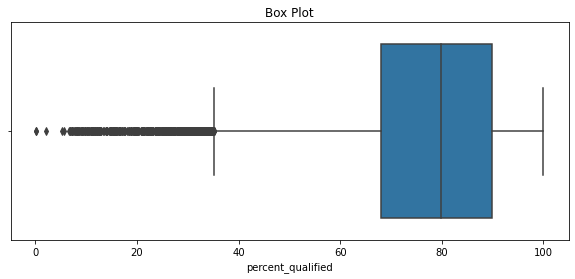

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


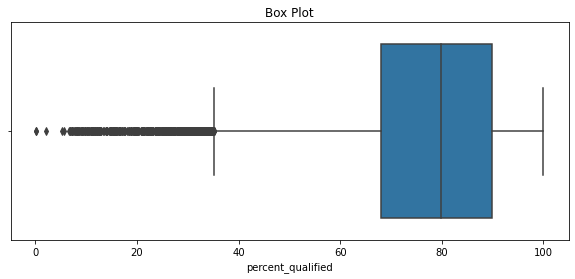

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


None


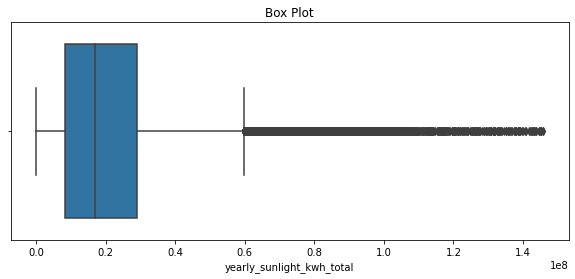

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


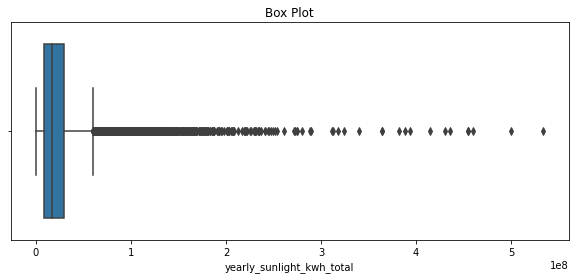

None


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


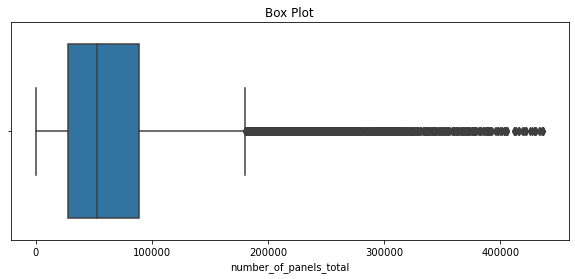

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


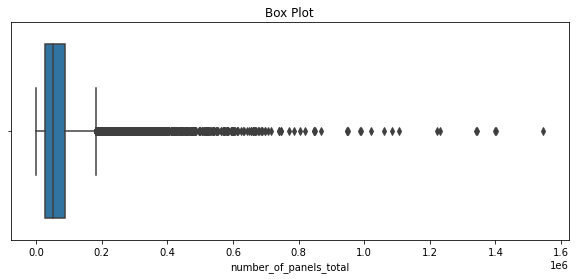

None


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


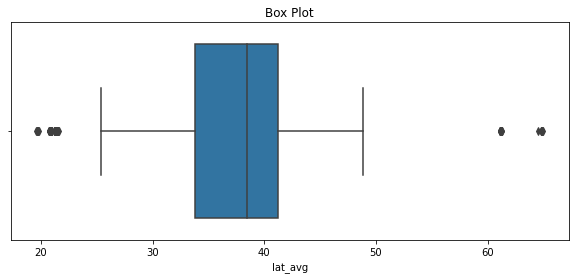

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


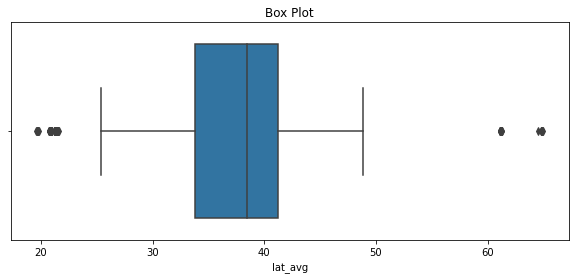

None


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


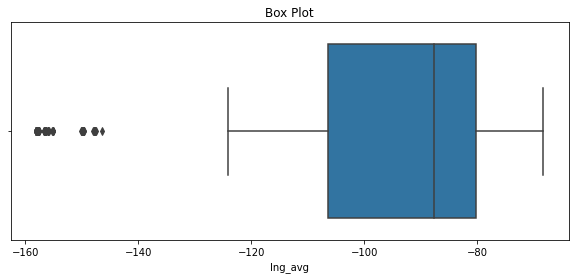

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


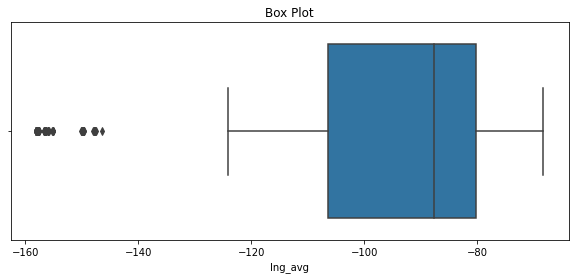

None


In [28]:
for col in num_cols:
    print(Box_plots(col))

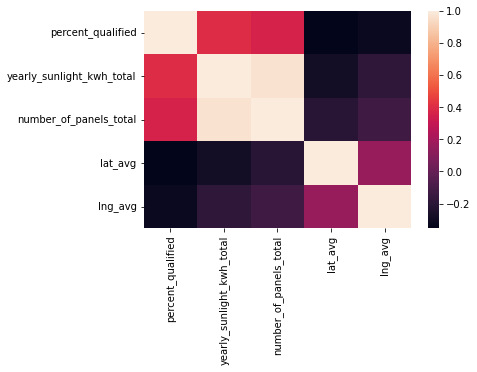

In [29]:
# Correlation Table

plt.figure.Figure(figsize=(100, 100))
sns.heatmap(outlier_replaced[num_cols].corr());

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_pro_sc=sc.fit_transform(data_pro)

In [31]:
data_pro_sc=pd.DataFrame(data_pro_sc)

In [32]:
data_pro_sc

,0,1,2,3,4,5,6
0,0.567993,-0.720845,-0.807701,-0.630106,-1.488050,-1.275316,-0.715693
1,0.536402,0.503193,0.836709,1.129363,0.899897,0.579190,0.677715
2,-1.359101,-0.698991,-0.656316,0.955466,0.229613,-0.585611,-0.587415
3,-2.530543,-0.931922,-0.922717,0.588339,0.760297,0.946668,-0.813153
4,0.831282,0.042188,-0.106606,-0.713830,-1.458828,-1.273958,-0.121613
...,...,...,...,...,...,...,...
48659,0.446877,0.018709,-0.033370,-0.846002,-0.229240,1.324629,-0.059556
48660,-2.040645,-0.007960,0.141398,0.670497,1.083023,0.453902,0.088536
48661,1.229271,0.580772,0.350389,-0.712147,-1.477770,-1.275289,0.265626
48662,0.390277,0.610297,0.668044,-0.660498,0.693211,1.136693,0.534795


In [33]:
X = data_pro_sc.iloc[:,:-1]
X

,0,1,2,3,4,5
0,0.567993,-0.720845,-0.807701,-0.630106,-1.488050,-1.275316
1,0.536402,0.503193,0.836709,1.129363,0.899897,0.579190
2,-1.359101,-0.698991,-0.656316,0.955466,0.229613,-0.585611
3,-2.530543,-0.931922,-0.922717,0.588339,0.760297,0.946668
4,0.831282,0.042188,-0.106606,-0.713830,-1.458828,-1.273958
...,...,...,...,...,...,...
48659,0.446877,0.018709,-0.033370,-0.846002,-0.229240,1.324629
48660,-2.040645,-0.007960,0.141398,0.670497,1.083023,0.453902
48661,1.229271,0.580772,0.350389,-0.712147,-1.477770,-1.275289
48662,0.390277,0.610297,0.668044,-0.660498,0.693211,1.136693


In [67]:
Y = data_pro_sc.iloc[:,-1]
Y

0       -0.715693
1        0.677715
2       -0.587415
3       -0.813153
4       -0.121613
           ...   
48659   -0.059556
48660    0.088536
48661    0.265626
48662    0.534795
48663   -1.027992
Name: 6, Length: 48664, dtype: float64

In [75]:
 X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [76]:
X_train

,0,1,2,3,4,5
752,0.366486,0.912183,0.933949,-0.429273,0.840755,0.642827
41908,1.110357,1.257087,1.702584,1.060698,0.437410,-0.037003
33995,1.254137,2.055534,2.012256,-1.839158,0.623015,-0.903406
5936,0.960697,-0.367675,-0.496876,-0.649849,-1.523811,-1.270751
22663,-0.472992,-0.405139,-0.405030,-1.377166,0.107836,-0.287090
...,...,...,...,...,...,...
43723,0.861242,3.489484,2.914022,-0.719529,-1.471648,-1.275262
32511,-0.756086,-1.113843,-1.149839,0.790839,0.279687,-0.585803
5192,0.257498,0.236351,0.072864,-0.694512,-1.463990,-1.275292
12172,1.180488,1.887817,1.363710,-0.758565,-1.137535,-1.400362


In [77]:
Y_train

752      0.760112
41908    1.411423
33995    1.673827
5936    -0.452312
22663   -0.374485
           ...   
43723    2.437947
32511   -1.005607
5192     0.030463
12172    1.124275
33003   -0.780651
Name: 6, Length: 38931, dtype: float64

In [78]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

import xgboost as xgb
import lightgbm as lgbm

In [128]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
#     mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    adj_r2 = 1 - ((1 - r2) * (len(y_true) - 1) / (len(y_true) - X.shape[1] - 1))

    print('explained_variance: ', round(explained_variance,4))    
#     print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('Adjusted rR2: ', round(adj_r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [129]:
X.shape[1]

6

In [130]:
import statsmodels.api as sm
def get_rmse(reg, model_name):
    """Print the score for the model passed in argument and retrun scores for the train/test sets"""
    
    y_train_pred, y_pred = reg.predict(X_train), reg.predict(X_test)
    rmse_train, rmse_test = np.sqrt(mean_squared_error(Y_train, y_train_pred)), np.sqrt(mean_squared_error(Y_test, y_pred))
    print(model_name, f'\t - RMSE on Training  = {rmse_train:.2f} / RMSE on Test = {rmse_test:.2f}')
#     print("*****"*20)
#     score_train = model.score(Y_train.values.reshape(-1, 1), y_train_pred.values.reshape(-1, 1))
#     print(model_name, f'\t - Score on Training ={score_train}')
#     print("*****"*20)      
#     score_test = model.score(Y_test.values.reshape(-1, 1), y_pred.values.reshape(-1, 1))
#     print(model_name, f'\t - Score on Testing ={score_test}')
    
    print("*****"*20)
    print(model_name, f'\t - Regression Results on Training ={regression_results(Y_train, y_train_pred)}')     
    print("*****"*20)
    print(model_name, f'\t - Regression Results on Testing ={regression_results(Y_test, y_pred)}')     
    print("*****"*20)
    return rmse_train, rmse_test

In [131]:
model_list = [LinearRegression(), Lasso(), Ridge(), ElasticNet(),
    xgb.XGBRegressor(), lgbm.LGBMRegressor()]

In [132]:
model_names=[]
model_names.append("base_line")
model_names.extend([str(m)[:str(m).index('(')] for m in model_list])

In [133]:
Y_test.shape

(9733,)

In [134]:
rmse_train,rmse_test=[],[]
for model, name in zip(model_list, model_names):
    model.fit(X_train, Y_train)
    sc_train, sc_test = get_rmse(model, name)
    rmse_train.append(sc_train)
    rmse_test.append(sc_test)
    print("====="*10)

base_line 	 - RMSE on Training  = 0.53 / RMSE on Test = 0.57
****************************************************************************************************
explained_variance:  0.7153
r2:  0.7153
Adjusted rR2:  0.7152
MAE:  0.0698
MSE:  0.2817
RMSE:  0.5308
base_line 	 - Regression Results on Training =None
****************************************************************************************************
explained_variance:  0.6896
r2:  0.6896
Adjusted rR2:  0.6894
MAE:  0.0747
MSE:  0.3235
RMSE:  0.5688
base_line 	 - Regression Results on Testing =None
****************************************************************************************************
LinearRegression 	 - RMSE on Training  = 0.99 / RMSE on Test = 1.02
****************************************************************************************************
explained_variance:  0.0
r2:  0.0
Adjusted rR2:  -0.0002
MAE:  0.6488
MSE:  0.9895
RMSE:  0.9947
LinearRegression 	 - Regression Results on Training =None
*******

In [135]:
svm_lin = LinearSVR()
svm_lin.fit(X_train, Y_train)
sc_train, sc_test = get_rmse(svm_lin, "SVM lin.")
model_names.append("SVM lin.")
rmse_train.append(sc_train)
rmse_test.append(sc_test)

SVM lin. 	 - RMSE on Training  = 0.54 / RMSE on Test = 0.58
****************************************************************************************************
explained_variance:  0.7115
r2:  0.7106
Adjusted rR2:  0.7105
MAE:  0.0303
MSE:  0.2864
RMSE:  0.5352
SVM lin. 	 - Regression Results on Training =None
****************************************************************************************************
explained_variance:  0.682
r2:  0.6808
Adjusted rR2:  0.6806
MAE:  0.0352
MSE:  0.3326
RMSE:  0.5767
SVM lin. 	 - Regression Results on Testing =None
****************************************************************************************************


In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


poly_lin_reg = Pipeline([
    ("poly_feat", PolynomialFeatures(degree=2)),
    ("linear_reg", LinearRegression())
])

poly_lin_reg.fit(X_train, Y_train)

sc_train, sc_test = get_rmse(poly_lin_reg, "Poly Linear Reg")

Poly Linear Reg 	 - RMSE on Training  = 0.52 / RMSE on Test = 0.55
0.901380399667622
****************************************************************************************************


In [46]:
type(data)

pandas.core.frame.DataFrame

In [47]:
data_pro

,percent_qualified,yearly_sunlight_kwh_total,number_of_panels_total,lat_avg,lng_avg,region_name,kw_total
0,86.303387,7.922383e+06,20876.0,34.267040,-118.432716,6037104401,5219.00
1,85.813953,3.117606e+07,113565.0,43.156368,-77.607040,36055009400,28391.25
2,56.446991,8.337565e+06,29409.0,42.277794,-89.066589,17201000700,7352.25
3,38.297872,3.912445e+06,14393.0,40.422962,-79.993729,42003180300,3598.25
4,90.382514,2.241812e+07,60394.0,33.844044,-117.933113,6059086602,15098.50
...,...,...,...,...,...,...,...
48717,84.426947,2.197206e+07,64522.0,33.176277,-96.911400,48121020113,16130.50
48718,45.887850,2.146542e+07,74373.0,40.838047,-74.476219,34027042302,18593.25
48719,96.548550,3.264987e+07,86153.0,33.852547,-118.256958,6037543322,21538.25
48720,83.550045,3.321077e+07,104058.0,34.113491,-81.140663,45079010309,26014.50


In [48]:
columns_headers={
    "0":"percent_qualified",
    "1":"yearly_sunlight_kwh_total",
    "2":"number_of_panels_total",
    "3":"lat_avg",
    "4":"lng_avg",
    "5":"region_name",
    "6":"kw_total"
}

In [49]:
data_proN = data_pro.rename(columns_headers, axis=1) 

In [50]:
type(data_pro)

pandas.core.frame.DataFrame

In [51]:
data_proN

,percent_qualified,yearly_sunlight_kwh_total,number_of_panels_total,lat_avg,lng_avg,region_name,kw_total
0,86.303387,7.922383e+06,20876.0,34.267040,-118.432716,6037104401,5219.00
1,85.813953,3.117606e+07,113565.0,43.156368,-77.607040,36055009400,28391.25
2,56.446991,8.337565e+06,29409.0,42.277794,-89.066589,17201000700,7352.25
3,38.297872,3.912445e+06,14393.0,40.422962,-79.993729,42003180300,3598.25
4,90.382514,2.241812e+07,60394.0,33.844044,-117.933113,6059086602,15098.50
...,...,...,...,...,...,...,...
48717,84.426947,2.197206e+07,64522.0,33.176277,-96.911400,48121020113,16130.50
48718,45.887850,2.146542e+07,74373.0,40.838047,-74.476219,34027042302,18593.25
48719,96.548550,3.264987e+07,86153.0,33.852547,-118.256958,6037543322,21538.25
48720,83.550045,3.321077e+07,104058.0,34.113491,-81.140663,45079010309,26014.50


In [52]:
import smogn

In [54]:
power_smogn = smogn.smoter(data = data_pro.reset_index(drop=True),y = "kw_total")

r_index: 100%|####################################################################| 3356/3356 [00:04<00:00, 786.59it/s]


In [56]:
power_smogn

,percent_qualified,yearly_sunlight_kwh_total,number_of_panels_total,lat_avg,lng_avg,region_name,kw_total
0,74.447613,3.401393e+07,117609.269862,43.082599,-89.350187,55025004165,29396.369140
1,97.011024,3.424508e+07,117702.302215,43.132814,-89.304249,55025011285,29460.919152
2,77.703377,3.016544e+07,118538.146123,45.324549,-122.622085,41005022631,29828.887218
3,80.002456,3.190300e+07,121965.189158,44.848499,-123.043151,41003698901,30205.928026
4,96.007832,4.121281e+07,117837.941529,27.479240,-82.487114,12081002006,29533.854269
...,...,...,...,...,...,...,...
48652,84.277816,4.664822e+07,155420.000000,38.006809,-87.504837,18163000201,38855.000000
48653,95.457064,3.752236e+07,103387.000000,37.615566,-120.966522,6099002702,25846.750000
48656,62.668559,1.068894e+07,37674.000000,41.918575,-74.018982,36111952200,9418.500000
48662,83.550045,3.321077e+07,104058.000000,34.113491,-81.140663,45079010309,26014.500000


In [57]:
power_smogn=sc.fit_transform(power_smogn)
power_smogn=pd.DataFrame(power_smogn)

In [58]:
X_somgn = power_smogn.iloc[:,:-1]

In [59]:
Y_smogn = power_smogn.iloc[:,-1]
Y_smogn

0       -0.092484
1       -0.089719
2       -0.073963
3       -0.057817
4       -0.086596
           ...   
41667    0.312544
41668   -0.244481
41669   -0.947954
41670   -0.237298
41671   -1.350171
Name: 6, Length: 41672, dtype: float64

In [136]:
 X_train, X_test, Y_train, Y_test = train_test_split(X_somgn, Y_smogn, test_size = 0.2, random_state = 1)

In [138]:
rmse_train,rmse_test=[],[]
for model, name in zip(model_list, model_names):
    model.fit(X_train, Y_train)
    sc_train, sc_test = get_rmse(model, name)
    rmse_train.append(sc_train)
    rmse_test.append(sc_test)
#     model.Summary()
    print("====="*10)

base_line 	 - RMSE on Training  = 0.62 / RMSE on Test = 0.65
****************************************************************************************************
explained_variance:  0.6087
r2:  0.6087
Adjusted rR2:  0.6086
MAE:  0.1586
MSE:  0.3903
RMSE:  0.6248
base_line 	 - Regression Results on Training =None
****************************************************************************************************
explained_variance:  0.5827
r2:  0.5827
Adjusted rR2:  0.5824
MAE:  0.1653
MSE:  0.4215
RMSE:  0.6492
base_line 	 - Regression Results on Testing =None
****************************************************************************************************
LinearRegression 	 - RMSE on Training  = 1.00 / RMSE on Test = 1.00
****************************************************************************************************
explained_variance:  0.0
r2:  0.0
Adjusted rR2:  -0.0002
MAE:  0.6986
MSE:  0.9975
RMSE:  0.9988
LinearRegression 	 - Regression Results on Training =None
*******